In [12]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy.stats import norm
import os

mpl.rcParams['xtick.labelsize'] = 16 
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['axes.titlesize'] = 24
plt.rcParams['legend.fontsize'] = 16

mpl.rcParams['font.family'] = 'serif'

### Task 1

In [13]:
# Load count rate date from txt using pandas
cr_no_light = pd.read_csv('data/no_light_count_rate.txt', sep='\t', skiprows=18)
cr650 = pd.read_csv('data/650nm_count_rate.txt', sep='\t', skiprows=18)
cr1310 = pd.read_csv('data/1310nm_count_rate.txt', sep='\t', skiprows=18)
cr1550 = pd.read_csv('data/1550nm_count_rate.txt', sep='\t', skiprows=18)
 
# Only keep columns "BV5" and "C5" and "BC"
cr650 = cr650[["BV5", "C5", "BC"]]
cr1310 = cr1310[["BV5", "C5", "BC"]]
cr1550 = cr1550[["BV5", "C5", "BC"]]
cr_no_light = cr_no_light[["BV5", "C5", "BC"]]

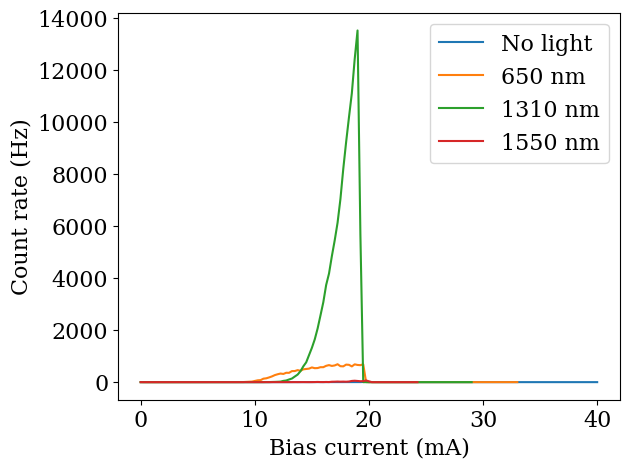

In [14]:
# plot C5 as function of BC
plt.plot(cr_no_light["BC"], cr_no_light["C5"], label="No light")
plt.plot(cr650["BC"], cr650["C5"], label="650 nm")
plt.plot(cr1310["BC"], cr1310["C5"], label="1310 nm")
plt.plot(cr1550["BC"], cr1550["C5"], label="1550 nm")
plt.xlabel("Bias current (mA)")
plt.ylabel("Count rate (Hz)")
plt.legend()
plt.tight_layout()

plt.show()

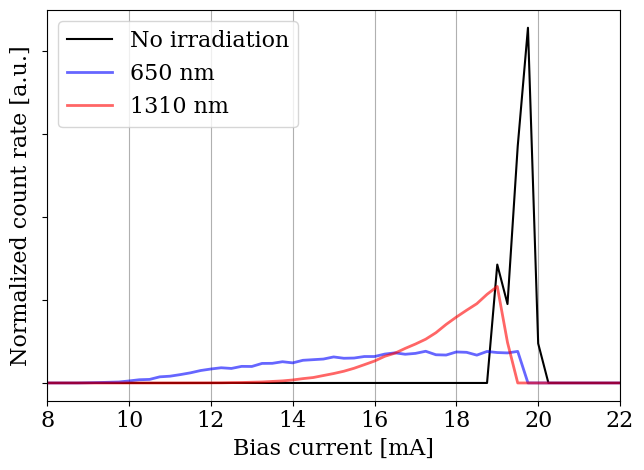

In [15]:
# Normalize counts by sum of counts
counts_650 = cr650["C5"].sum()
cr650["C5_norm"] = cr650["C5"] / counts_650
counts_1310 = cr1310["C5"].sum()
cr1310["C5_norm"] = cr1310["C5"] / counts_1310
counts_1550 = cr1550["C5"].sum()
cr1550["C5_norm"] = cr1550["C5"] / counts_1550
counts_no_light = cr_no_light["C5"].sum()
cr_no_light["C5_norm"] = cr_no_light["C5"] / counts_no_light

# Plot normalized count rate
plt.plot(cr_no_light["BC"], cr_no_light["C5_norm"], label="No irradiation", color = "k")
plt.plot(cr650["BC"], cr650["C5_norm"], label="650 nm", linewidth=2, color = "b", alpha = 0.6)
plt.plot(cr1310["BC"], cr1310["C5_norm"], label="1310 nm", linewidth=2, color = "r", alpha = 0.6)
#plt.plot(cr1550["BC"], cr1550["C5_norm"], label="1550 nm")
plt.xlabel("Bias current [mA]")
plt.ylabel("Normalized count rate [a.u.]")
plt.gca().axes.yaxis.set_ticklabels([])
plt.legend()
plt.tight_layout()
plt.xlim(8, 22)
#only vertical grid lines
plt.grid(axis='x')
plt.show()

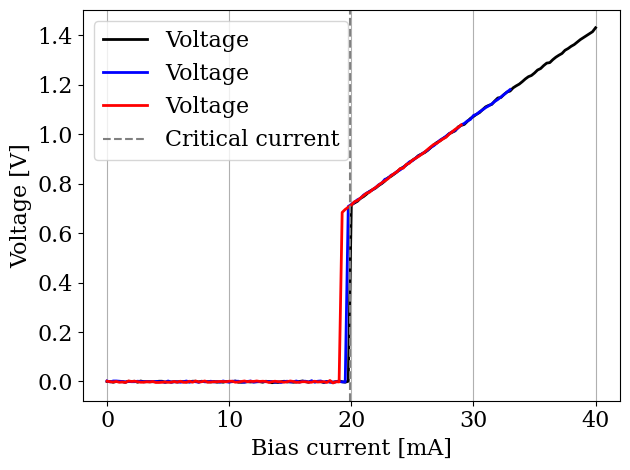

In [16]:
I_c = (20 + 19.75)/2

# Plot BV5 as function of BC for no_light case
plt.plot(cr_no_light["BC"], cr_no_light["BV5"], label="Voltage", linewidth=2, color = 'k')
plt.plot(cr650["BC"], cr650["BV5"], label="Voltage", linewidth=2, color = 'b')
plt.plot(cr1310["BC"], cr1310["BV5"], label="Voltage", linewidth=2, color = 'r')
plt.xlabel("Bias current [mA]")
plt.ylabel("Voltage [V]")
plt.legend()
plt.grid(axis='x')
plt.tight_layout()
plt.axvline(x=I_c, color='grey', linestyle='--', label="Critical current")
plt.legend()
plt.show()

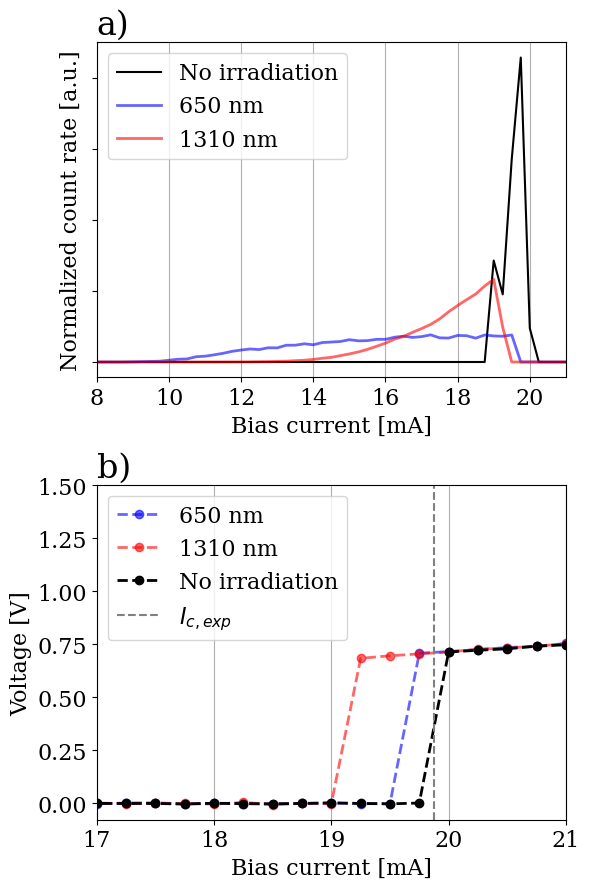

In [17]:
fig, axes = plt.subplots(2, 1, figsize=(6, 9))
axes[0].plot(cr_no_light["BC"], cr_no_light["C5_norm"], label="No irradiation", color = "k")
axes[0].plot(cr650["BC"], cr650["C5_norm"], label="650 nm", linewidth=2, color = "b", alpha = 0.6)
axes[0].plot(cr1310["BC"], cr1310["C5_norm"], label="1310 nm", linewidth=2, color = "r", alpha = 0.6)
axes[0].set_xlabel("Bias current [mA]")
axes[0].set_ylabel("Normalized count rate [a.u.]")
axes[0].set_xlim(8, 21)
axes[0].axes.yaxis.set_ticklabels([])
axes[0].legend()
axes[0].set_title("a)", loc="left")
axes[0].grid(axis='x')

axes[1].plot(cr650["BC"], cr650["BV5"], label="650 nm", linewidth=2, color = 'b', marker='o', linestyle = "--", alpha = 0.6)
axes[1].plot(cr1310["BC"], cr1310["BV5"], label="1310 nm", linewidth=2, color = 'r', marker='o', linestyle = "--", alpha = 0.6)
axes[1].plot(cr_no_light["BC"], cr_no_light["BV5"], label="No irradiation", linewidth=2, color = 'k', marker='o', linestyle = "--")
axes[1].set_xlabel("Bias current [mA]")
axes[1].set_ylabel("Voltage [V]")
axes[1].grid(axis='x')
axes[1].axvline(x=I_c, color='grey', linestyle='--', label="$I_{c,exp}$")
axes[1].set_xlim(17, 21)
axes[1].legend()
axes[1].set_title("b)", loc="left")
plt.tight_layout()

plt.show()

# Save
fig.savefig("figures/bias_current_sweep.png", bbox_inches='tight')


### Task 2

,power_dBm,power_mW,mean,std
0,-5.04,0.313329,23866.967742,2002.987344
1,-5.32,0.293765,23403.333333,1871.652417
2,-5.63,0.273527,21235.741935,1599.264393
3,-5.97,0.252930,18715.000000,1458.757022
4,-6.32,0.233346,16879.943396,1338.890505
5,-6.71,0.213304,13742.478261,1113.503230
6,-7.13,0.193642,13146.096774,1100.996317


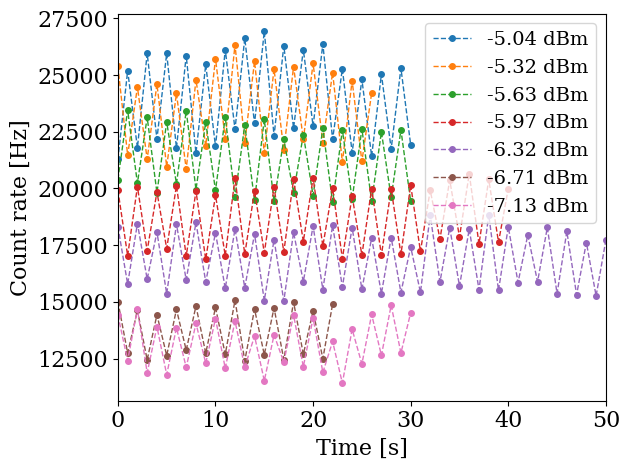

In [18]:
power_file_names = ["5-04", "5-32", "5-63", "5-97", "6-32", "6-71", "7-13"]
power_levels_dBm = np.array([-5.04, -5.32, -5.63, -5.97, -6.32, -6.71, -7.13])
power_levels_mW = 10**(power_levels_dBm/10)

count_data = pd.DataFrame(columns=["power_dBm", "power_mW", "mean", "std"])
for i, filename in enumerate(power_file_names):
    count_data_file = pd.read_csv('data/' + filename + 'dBm.txt', sep='\t', skiprows=9)

    count_data_file = count_data_file[["C4"]]

    time = np.arange(0, len(count_data_file), 1)


    # plot time series
    plt.plot(time, count_data_file["C4"], linewidth=1, marker='o', linestyle = "--", markersize=4, label=f"{power_levels_dBm[i]} dBm")
    plt.xlabel("Time [s]")
    plt.ylabel("Count rate [Hz]")
    # legend 
    plt.legend(fontsize=14)
    plt.tight_layout()
    plt.xlim(0, 50)




    mean = float(count_data_file.mean())
    std = float(count_data_file.std())
    count_data.loc[i] = [power_levels_dBm[i], power_levels_mW[i], mean, std]

count_data

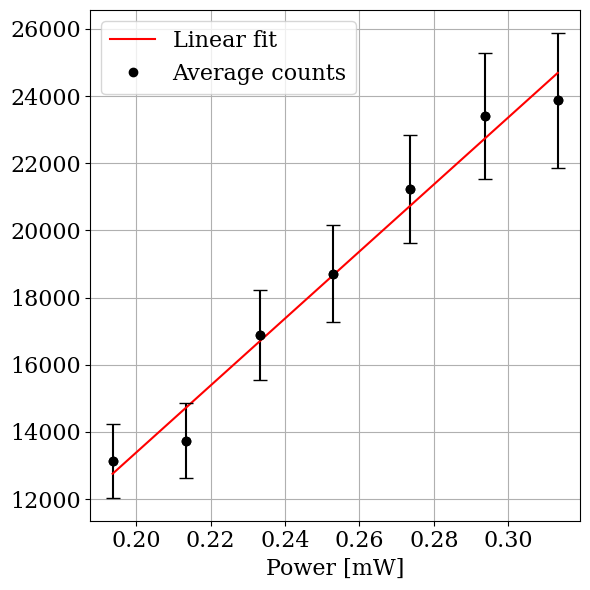

'\n# same plot but with dbm\nplt.plot(count_data["power_dBm"], count_data["mean"], label="Mean", linestyle=\'--\', marker=\'o\')\nplt.xlabel("Power (dBm)")\nplt.ylabel("Counts")\nplt.legend()\nplt.tight_layout()\nplt.grid()\nplt.show()\n'

In [19]:
# Do a linear fit
def linear(x, a, b):
    return a*x + b

popt, pcov = curve_fit(linear, count_data["power_mW"], count_data["mean"])

# Plot mean and std as function of power
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(count_data["power_mW"], linear(count_data["power_mW"], *popt), label="Linear fit", color = "r")
ax.plot(count_data["power_mW"], count_data["mean"], label="Average counts", linestyle='None', marker='o', color = "k")
ax.errorbar(count_data["power_mW"], count_data["mean"], yerr=count_data["std"], fmt='o', color = "k", capsize=5)
ax.set_xlabel("Power [mW]")
ax.set_ylabel("")
ax.legend()
ax.grid()

plt.tight_layout()
plt.show()

# Save
fig.savefig("figures/power_dependance.png", bbox_inches='tight')

"""
# same plot but with dbm
plt.plot(count_data["power_dBm"], count_data["mean"], label="Mean", linestyle='--', marker='o')
plt.xlabel("Power (dBm)")
plt.ylabel("Counts")
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()
"""

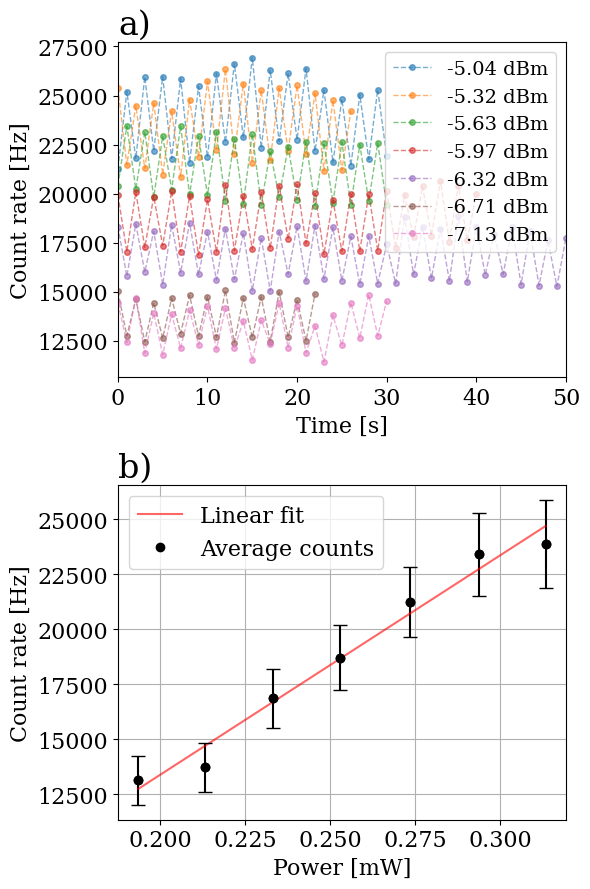

In [29]:
power_file_names = ["5-04", "5-32", "5-63", "5-97", "6-32", "6-71", "7-13"]
power_levels_dBm = np.array([-5.04, -5.32, -5.63, -5.97, -6.32, -6.71, -7.13])
power_levels_mW = 10**(power_levels_dBm/10)

fig, ax = plt.subplots(2, 1, figsize=(6, 9))

for i, filename in enumerate(power_file_names):
    count_data_file = pd.read_csv('data/' + filename + 'dBm.txt', sep='\t', skiprows=9)
    count_data_file = count_data_file[["C4"]]

    time = np.arange(0, len(count_data_file), 1)

    ax[0].plot(time, count_data_file["C4"], linewidth=1, marker='o', alpha = 0.6, linestyle = "--", markersize=4, label=f"{power_levels_dBm[i]} dBm")
    
ax[0].set_xlabel("Time [s]")
ax[0].set_ylabel("Count rate [Hz]")
# legend 
ax[0].legend(fontsize=14)
ax[0].set_xlim(0, 50)
ax[0].set_title("a)", loc="left")

# Plot mean and std as function of power
ax[1].plot(count_data["power_mW"], linear(count_data["power_mW"], *popt), label="Linear fit", color = "r", alpha = 0.6)
ax[1].plot(count_data["power_mW"], count_data["mean"], label="Average counts", linestyle='None', marker='o', color = "k")
ax[1].errorbar(count_data["power_mW"], count_data["mean"], yerr=count_data["std"], fmt='o', color = "k", capsize=5)
ax[1].set_xlabel("Power [mW]")
ax[1].set_ylabel("Count rate [Hz]")
ax[1].legend()
ax[1].grid()
ax[1].set_title("b)", loc="left")

plt.tight_layout()
plt.show()

# Save
fig.savefig("figures/power_dependance.png", bbox_inches='tight')

fig.tight_layout()


### Task 3

In [21]:
channel = 4

# All files for events
events = os.listdir(f"data/detection_events_ch{channel}")
times = pd.DataFrame(columns=["rise_time", "decay_time"])
for event in events:
    # Load data from event
    path = f"data/detection_events_ch{channel}/" + event
    curr_event = pd.read_csv(path, sep=',', skiprows=4)
    curr_event["Time"] = curr_event["Time"]*10**9
    # Get max voltage, time at max voltage, lower and upper limit for decay and rise
    max_voltage = curr_event["Ampl"].max()
    time_at_max_voltage = curr_event[curr_event["Ampl"] == max_voltage]["Time"].iloc[0]
    lower_limit = 0.1*max_voltage
    upper_limit = 0.9*max_voltage
    # Get rise and decay start and end times
    t1 = curr_event[curr_event["Ampl"] > lower_limit]["Time"].iloc[0]
    t2 = curr_event[curr_event["Ampl"] > upper_limit]["Time"].iloc[0]
    t3 = curr_event[(curr_event["Ampl"] < upper_limit) & (curr_event["Time"] > time_at_max_voltage)]["Time"].iloc[0]
    t4 = curr_event[(curr_event["Ampl"] < lower_limit) & (curr_event["Time"] > time_at_max_voltage)]["Time"].iloc[0]
    # Calculate rise and decay times and save to dataframe
    t_rise = t2 - t1
    t_decay = t4 - t3
    times.loc[len(times)] = [t_rise, t_decay]

times

,rise_time,decay_time
0,0.45,9.250002
1,0.40,9.350002
2,0.45,9.349997
3,0.40,9.149996
4,0.45,9.200000
...,...,...
237,0.40,9.550000
238,0.50,9.899997
239,0.45,9.550003
240,0.40,9.799995


0.45000002 9.399998


(-1.0, 15.0)

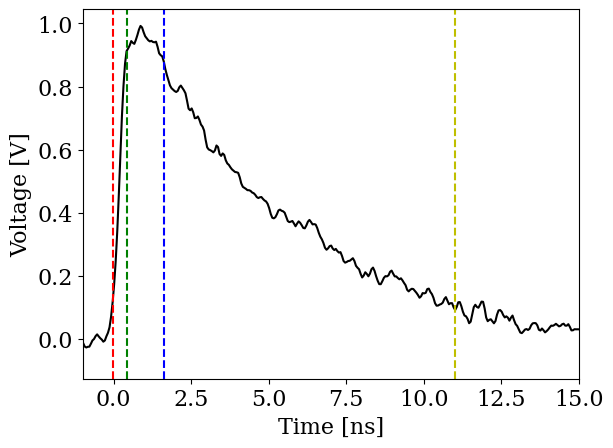

In [22]:
channel = 4

filenames = os.listdir(f"data/detection_events_ch{channel}")
path = f"data/detection_events_ch{channel}/C1--C--00055.txt"
data = pd.read_csv(path, sep=',', skiprows=4)
data["Time"] = data["Time"]*1e9

max_voltage = data["Ampl"].max()
lower_limit = 0.1*max_voltage
upper_limit = 0.9*max_voltage

time_at_max_voltage = data[data["Ampl"] == max_voltage]["Time"].iloc[0]

t1 = data[data["Ampl"] > lower_limit]["Time"].iloc[0]
t2 = data[data["Ampl"] > upper_limit]["Time"].iloc[0]
t3 = data[(data["Ampl"] < upper_limit) & (data["Time"] > time_at_max_voltage)]["Time"].iloc[0]
t4 = data[(data["Ampl"] < lower_limit) & (data["Time"] > time_at_max_voltage)]["Time"].iloc[0]

t_rise = t2 - t1
t_decay = t4 - t3

print(t_rise, t_decay)

plt.plot(data["Time"], data["Ampl"], color = "k")
plt.axvline(x=t1, color='r', linestyle='--', label="$t_1$")
plt.axvline(x=t2, color='g', linestyle='--', label="$t_2$")
plt.axvline(x=t3, color='b', linestyle='--', label="$t_3$")
plt.axvline(x=t4, color='y', linestyle='--', label="$t_4$")
#plt.axvline(x=time_at_max_voltage, color='k', linestyle='--', label="Time at max voltage")
#plt.axhline(y=lower_limit, color='r', linestyle='--')
#plt.axhline(y=upper_limit, color='g', linestyle='--')
plt.xlabel("Time [ns]")
plt.ylabel("Voltage [V]")
#plt.legend()
plt.xlim(-1, 15)


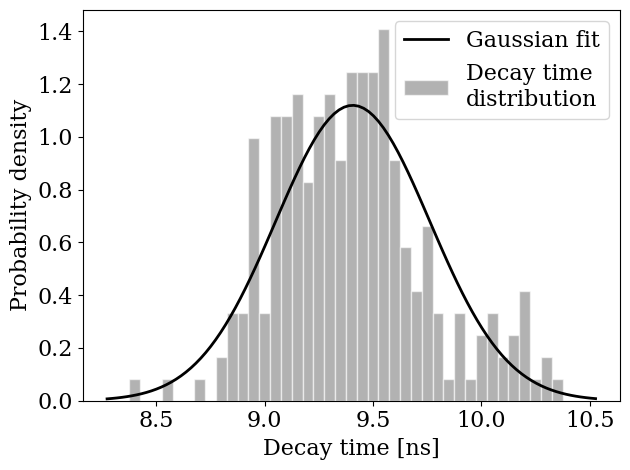

In [23]:
# Fit a normal distribution to the data:
mu_decay, std_decay = norm.fit(times["decay_time"])
bin_edges = np.arange(8.40, 10.50, 0.05) - 0.025

# Plot the histogram with gaussian fit
plt.hist(times["decay_time"], bins = bin_edges, density=True, color='gray', alpha = 0.6, edgecolor = "white", label="Decay time\ndistribution")

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu_decay, std_decay)
plt.plot(x, p, 'k', linewidth=2, label="Gaussian fit")

plt.xlabel("Decay time [ns]")
plt.ylabel("Probability density")
plt.legend()
plt.tight_layout()

In [31]:
# Fit a normal distribution to the data:
mu_rise, std_rise = norm.fit(times["rise_time"])

# fit using scipy.curve_fit
def gaussian(x, mu, sigma, A):
    return A*np.exp(-(x-mu)**2/(2*sigma**2))

# Plot the histogram with gaussian fit
bin_edges = np.array([0.35, 0.40, 0.45, 0.50, 0.55])-0.025
plt.hist(times["rise_time"], bins = bin_edges, density=True, alpha=0.6, color='gray', edgecolor= "w", label="Decay time\ndistribution")

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu_rise, std_rise)
plt.plot(x, p, 'k', linewidth=2, label="Frequency [a.u.]")

plt.xlabel("Rise time [ns]")
plt.ylabel("Probability density")
plt.legend()
plt.tight_layout()

NameError: name 'hist' is not defined

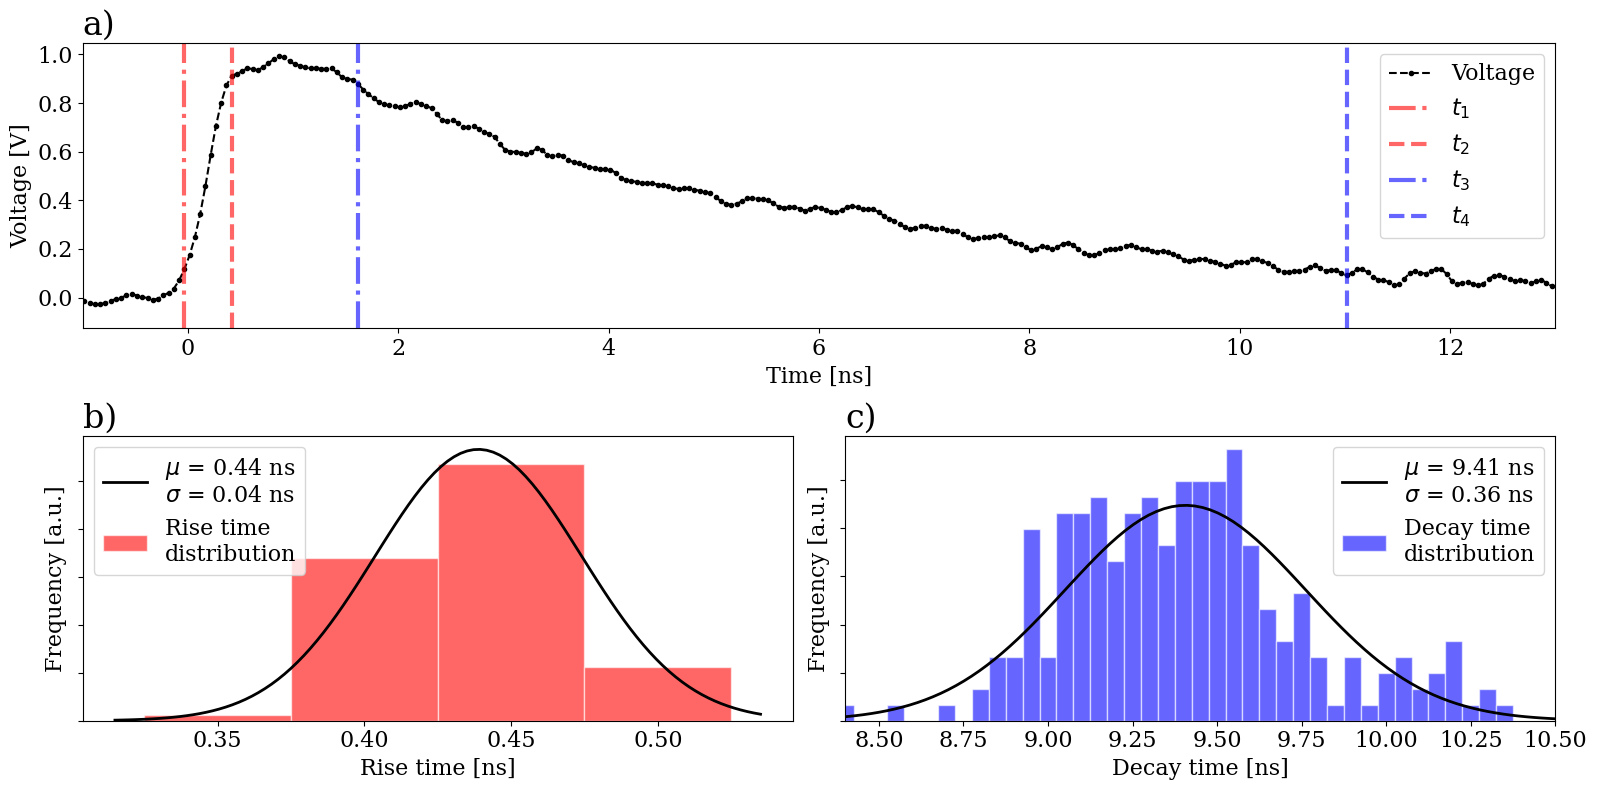

In [30]:
fig = plt.figure(figsize=(16, 8))

gs = fig.add_gridspec(2,2)
ax0 = fig.add_subplot(gs[0, :])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[1, 1])

# Plot the histogram with gaussian fit
ax0.plot(data["Time"], data["Ampl"], color = "k", linestyle = "--", marker = "o", markersize = 3, label="Voltage")
ax0.axvline(x=t1, color='r', linestyle='dashdot', label="$t_1$", linewidth = 3, alpha = 0.6)
ax0.axvline(x=t2, color='r', linestyle='dashed', label="$t_2$", linewidth = 3, alpha = 0.6)
ax0.axvline(x=t3, color='b', linestyle='dashdot', label="$t_3$", linewidth = 3, alpha = 0.6)
ax0.axvline(x=t4, color='b', linestyle='dashed', label="$t_4$", linewidth = 3, alpha = 0.6)

ax0.set_xlabel("Time [ns]")
ax0.set_ylabel("Voltage [V]")
ax0.legend()
ax0.set_xlim(-1, 13)
ax0.set_title("a)", loc="left")
#ax0.grid()

# Plot the rise histogram with fit
bin_edges = np.array([0.35, 0.40, 0.45, 0.50, 0.55])-0.025
ax1.hist(times["rise_time"], bins = bin_edges, density=True, alpha=0.6, color='r', edgecolor= "w", label="Rise time\ndistribution")

# Plot the PDF.
xmin, xmax = ax1.get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu_rise, std_rise)
ax1.plot(x, p, 'k', linewidth=2, label=f"$\mu$ = {mu_rise:.2f} ns\n$\sigma$ = {std_rise:.2f} ns")

ax1.set_xlabel("Rise time [ns]")
ax1.set_ylabel("Frequency [a.u.]")
ax1.axes.yaxis.set_ticklabels([])
ax1.set_title("b)", loc="left")
ax1.legend()

# Plot the decay histogram with fit
bin_edges = np.arange(8.40, 10.50, 0.05) - 0.025
ax2.hist(times["decay_time"], bins = bin_edges, density=True, color='b', alpha = 0.6, edgecolor = "white", label="Decay time\ndistribution")

# Plot the PDF.
xmin, xmax = ax2.get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu_decay, std_decay)
ax2.plot(x, p, 'k', linewidth=2, label=f"$\mu$ = {mu_decay:.2f} ns\n$\sigma$ = {std_decay:.2f} ns")

ax2.set_xlabel("Decay time [ns]")
ax2.set_ylabel("Frequency [a.u.]")
ax2.legend()
ax2.set_xlim(8.4, 10.5)
ax2.axes.yaxis.set_ticklabels([])
ax2.set_title("c)", loc="left")

plt.tight_layout()
plt.show()

# save
fig.savefig("figures/rise_and_decay_time.png", bbox_inches='tight')